In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

!pip install yfinance
import yfinance as yf

In [3]:
df=yf.download("373220.KS",start="2023-10-13",end="2023-10-25")
print(df)

[*********************100%%**********************]  1 of 1 completed
                Open      High       Low     Close  Adj Close  Volume
Date                                                                 
2023-10-13  490000.0  490000.0  480000.0  484000.0   484000.0  300483
2023-10-16  479500.0  481500.0  471500.0  474000.0   474000.0  255899
2023-10-17  479500.0  482500.0  474000.0  475000.0   475000.0  189464
2023-10-18  471500.0  472500.0  462000.0  465000.0   465000.0  317384
2023-10-19  455500.0  457000.0  450000.0  452500.0   452500.0  358437
2023-10-20  445500.0  446000.0  435500.0  436500.0   436500.0  363181
2023-10-23  438000.0  442500.0  430500.0  436500.0   436500.0  296136
2023-10-24  439500.0  449000.0  423000.0  448500.0   448500.0  393138


In [4]:
# convert dataframe to numpy
numpyData =df.values
numpyData

array([[490000., 490000., 480000., 484000., 484000., 300483.],
       [479500., 481500., 471500., 474000., 474000., 255899.],
       [479500., 482500., 474000., 475000., 475000., 189464.],
       [471500., 472500., 462000., 465000., 465000., 317384.],
       [455500., 457000., 450000., 452500., 452500., 358437.],
       [445500., 446000., 435500., 436500., 436500., 363181.],
       [438000., 442500., 430500., 436500., 436500., 296136.],
       [439500., 449000., 423000., 448500., 448500., 393138.]])

In [5]:
numpyDataShape = np.shape(numpyData)
numpyDataShape

(8, 6)

In [6]:
numpyDataShape = numpyData.shape
numpyDataShape

(8, 6)

In [7]:
# only close value
closeValue = numpyData[:,3:4]
print(" Close value(종가) = \n", closeValue)

 Close value(종가) = 
 [[484000.]
 [474000.]
 [475000.]
 [465000.]
 [452500.]
 [436500.]
 [436500.]
 [448500.]]


[Text(0.5, 1.0, ' LG engery solution time series'),
 Text(0, 0.5, 'Stock price')]

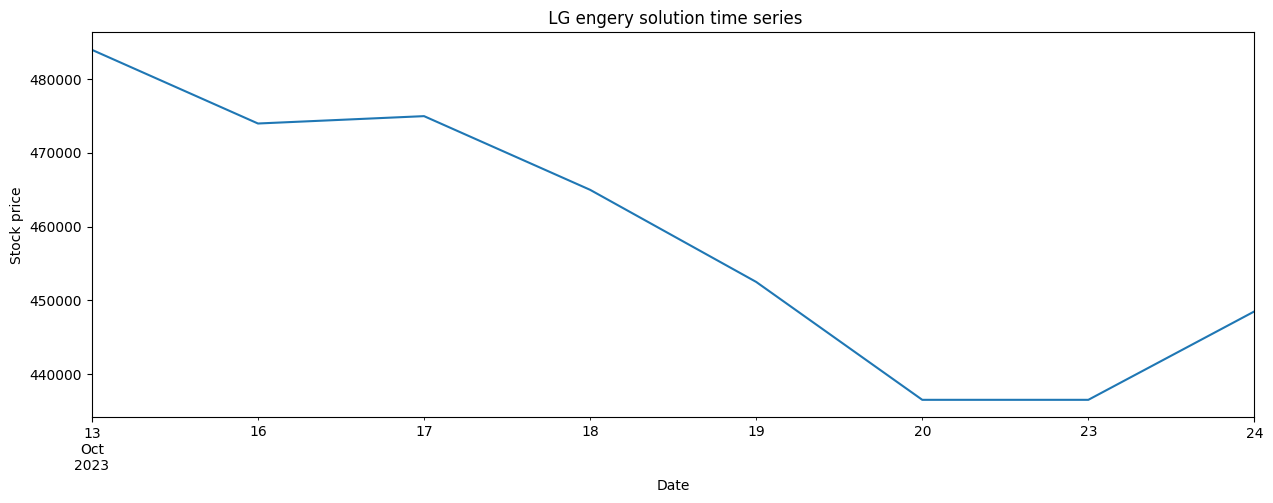

In [8]:
fig, (ax1) = plt.subplots(1, figsize=(15,5))
df.Close.plot(ax=ax1)
ax1.set(title = ' LG engery solution time series',
          ylabel = 'Stock price')


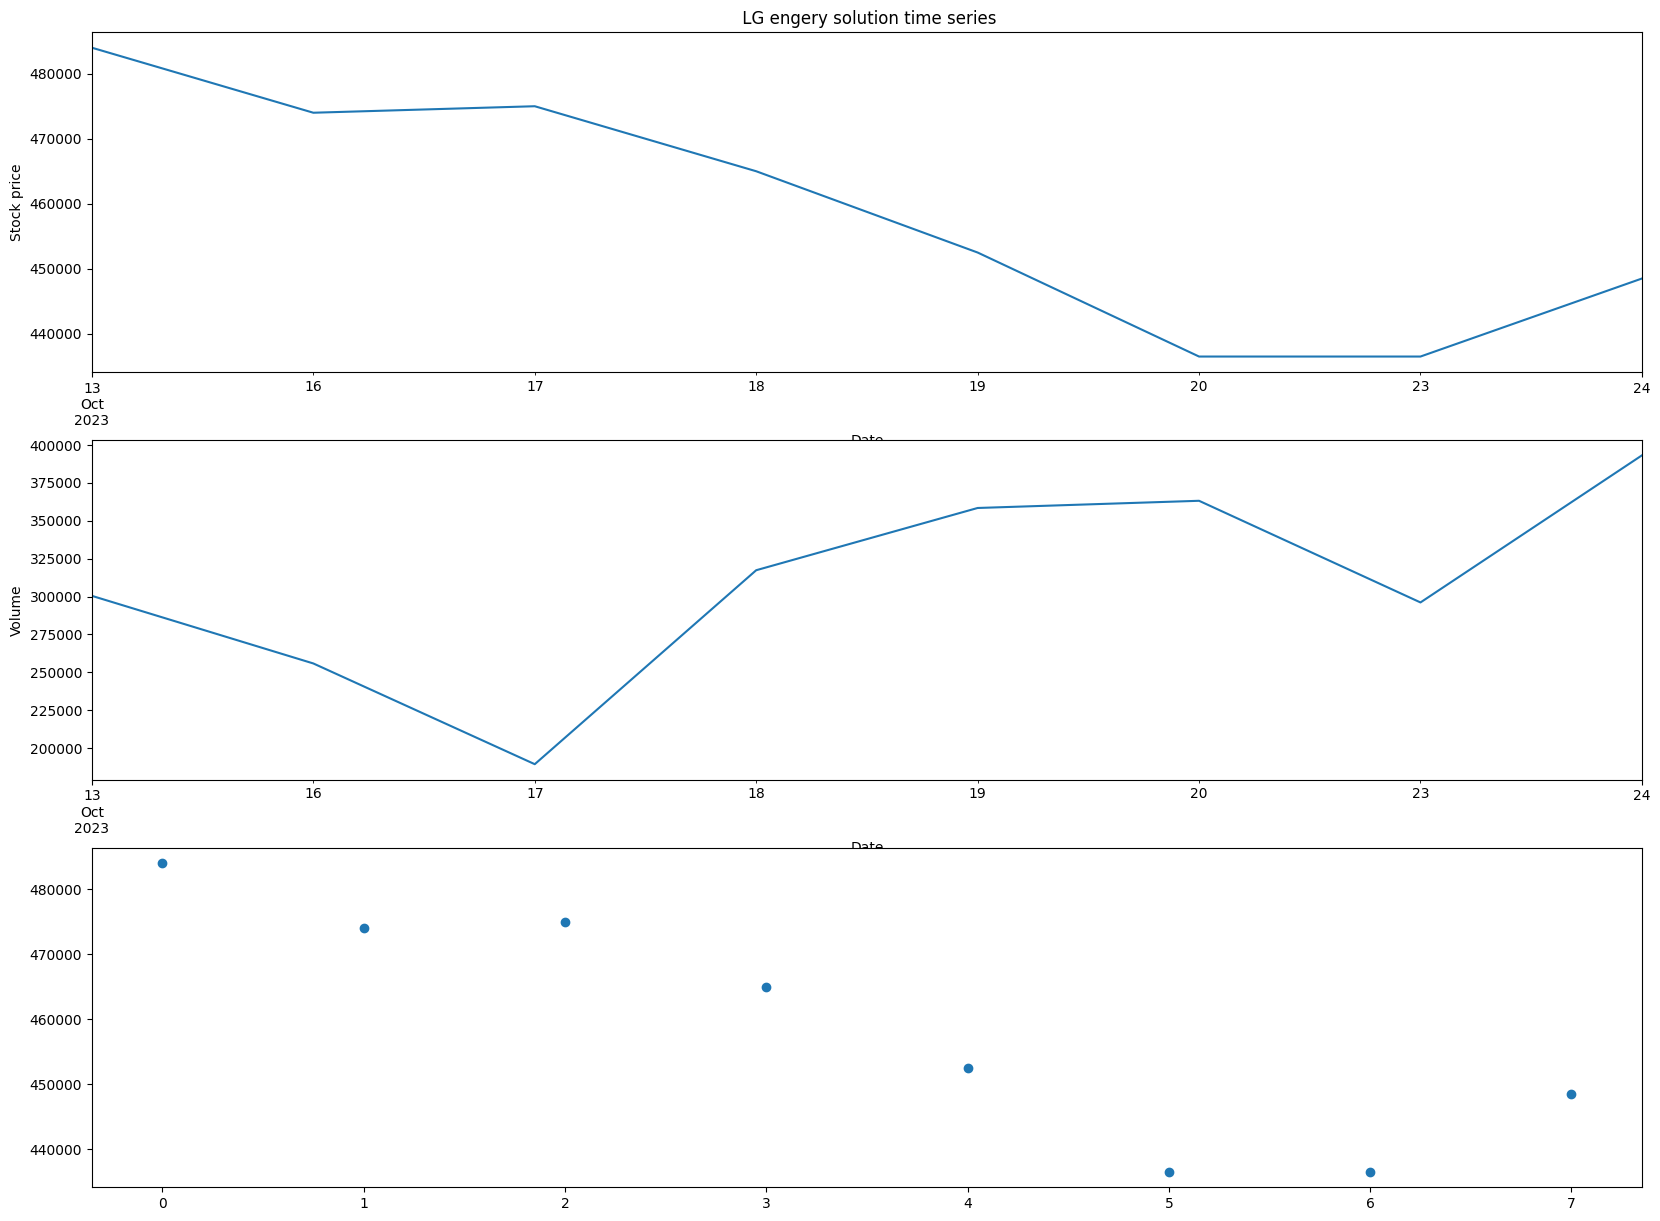

In [9]:
fig, (ax1,ax2,ax3) = plt.subplots(3, figsize=(20,15))
df.Close.plot(ax=ax1)
ax1.set(title = ' LG engery solution time series',
          ylabel = 'Stock price')

df.Volume.plot(ax=ax2)
ax2.set( ylabel = 'Volume')

xval=np.arange(8)
ax3.scatter(xval, closeValue)

In [10]:
x_data = np.arange(len(closeValue))   # len(closeValue) = 8
y_data = closeValue
print("x_data = ", x_data)
print("y_data = ", y_data)

x_data =  [0 1 2 3 4 5 6 7]
y_data =  [[484000.]
 [474000.]
 [475000.]
 [465000.]
 [452500.]
 [436500.]
 [436500.]
 [448500.]]


In [11]:
x_data = np.arange(len(closeValue))
x_data = (x_data+1).tolist()
y_data = closeValue.ravel()
y_data = (y_data/500000.).tolist()  # 정규화
print("x_data = ", x_data)
print("y_data = ", y_data)

x_data =  [1, 2, 3, 4, 5, 6, 7, 8]
y_data =  [0.968, 0.948, 0.95, 0.93, 0.905, 0.873, 0.873, 0.897]


In [12]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt  # 그래프 그리기


print(" Tensor flow version = ", tf.__version__)


learning_rate = 0.001 # 학습률

W = tf.Variable(1.0)
b = tf.Variable(0.5)

x_axis_loop = []
y_axis_cost = []


for i in range(20000+1):
    with tf.GradientTape() as tape:
        hypothesis = W * x_data + b
        cost = tf.reduce_mean(tf.square(hypothesis - y_data))
    W_grad, b_grad = tape.gradient(cost, [W, b])
    W.assign_sub(learning_rate * W_grad)  # 다음 W = 현재 W - learning_rate*W_grad
    b.assign_sub(learning_rate * b_grad)

    if ( i > 500):
      x_axis_loop.append(i)
      y_axis_cost.append(cost)

    if i % 1000 == 0:
      print("{:5}|{:10.4f}|{:10.4f}| cost = {:10.6f}".format(i, W.numpy(), b.numpy(), cost))



 Tensor flow version =  2.12.0
    0|    0.9526|    0.4918| cost =  22.054876
 1000|    0.0627|    0.5503| cost =   0.037980
 2000|    0.0376|    0.6913| cost =   0.017203
 3000|    0.0208|    0.7858| cost =   0.007854
 4000|    0.0096|    0.8492| cost =   0.003648
 5000|    0.0020|    0.8918| cost =   0.001755
 6000|   -0.0031|    0.9203| cost =   0.000903
 7000|   -0.0065|    0.9394| cost =   0.000520
 8000|   -0.0088|    0.9523| cost =   0.000348
 9000|   -0.0103|    0.9609| cost =   0.000270
10000|   -0.0113|    0.9667| cost =   0.000235
11000|   -0.0120|    0.9705| cost =   0.000220
12000|   -0.0125|    0.9731| cost =   0.000213
13000|   -0.0128|    0.9749| cost =   0.000209
14000|   -0.0130|    0.9760| cost =   0.000208
15000|   -0.0131|    0.9768| cost =   0.000207
16000|   -0.0132|    0.9774| cost =   0.000207
17000|   -0.0133|    0.9777| cost =   0.000207
18000|   -0.0133|    0.9779| cost =   0.000207
19000|   -0.0134|    0.9781| cost =   0.000207
20000|   -0.0134|    0.9782| 

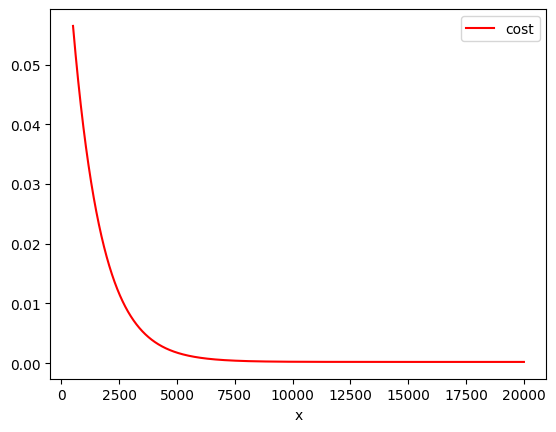

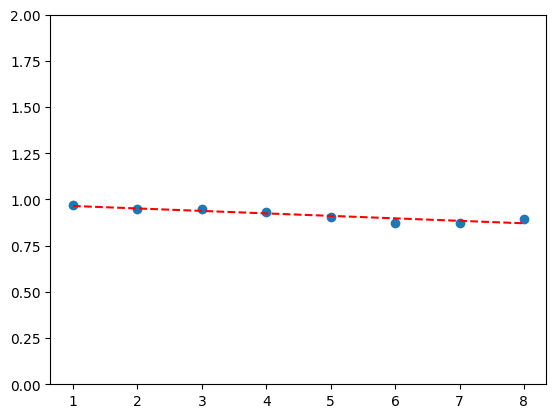

In [13]:
# cost 함수 그래프 그리기

plt.plot(x_axis_loop, y_axis_cost, 'r-', label='cost')
plt.legend()
plt.xlabel('x')
plt.show()

plt.plot(x_data, y_data, 'o')
plt.plot(x_data, hypothesis, 'r--')
plt.ylim(0.0, 2.0)
plt.show()


In [14]:
x_pred = [9]  #
# hypothesis = W * x_data + b
hypothesis = W * x_pred + b

print(" 예측 주가 = ", hypothesis)
price = hypothesis.numpy()[0]*500000.
print(" 예측 주가 = ", price)

 예측 주가 =  tf.Tensor([0.8577015], shape=(1,), dtype=float32)
 예측 주가 =  428850.7401943207


In [15]:
df=yf.download("373220.KS",start="2023-10-13",end="2023-10-25")
print(df)  # 데이터 확인

[*********************100%%**********************]  1 of 1 completed
                Open      High       Low     Close  Adj Close  Volume
Date                                                                 
2023-10-13  490000.0  490000.0  480000.0  484000.0   484000.0  300483
2023-10-16  479500.0  481500.0  471500.0  474000.0   474000.0  255899
2023-10-17  479500.0  482500.0  474000.0  475000.0   475000.0  189464
2023-10-18  471500.0  472500.0  462000.0  465000.0   465000.0  317384
2023-10-19  455500.0  457000.0  450000.0  452500.0   452500.0  358437
2023-10-20  445500.0  446000.0  435500.0  436500.0   436500.0  363181
2023-10-23  438000.0  442500.0  430500.0  436500.0   436500.0  296136
2023-10-24  439500.0  449000.0  423000.0  448500.0   448500.0  393138


In [16]:
print(df.columns)
print(df.index)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
DatetimeIndex(['2023-10-13', '2023-10-16', '2023-10-17', '2023-10-18',
               '2023-10-19', '2023-10-20', '2023-10-23', '2023-10-24'],
              dtype='datetime64[ns]', name='Date', freq=None)


In [17]:
print(df.Open)

Date
2023-10-13    490000.0
2023-10-16    479500.0
2023-10-17    479500.0
2023-10-18    471500.0
2023-10-19    455500.0
2023-10-20    445500.0
2023-10-23    438000.0
2023-10-24    439500.0
Name: Open, dtype: float64


In [18]:
print(df['Open'])

Date
2023-10-13    490000.0
2023-10-16    479500.0
2023-10-17    479500.0
2023-10-18    471500.0
2023-10-19    455500.0
2023-10-20    445500.0
2023-10-23    438000.0
2023-10-24    439500.0
Name: Open, dtype: float64


In [19]:
print(df[['Open','High','Close']])

                Open      High     Close
Date                                    
2023-10-13  490000.0  490000.0  484000.0
2023-10-16  479500.0  481500.0  474000.0
2023-10-17  479500.0  482500.0  475000.0
2023-10-18  471500.0  472500.0  465000.0
2023-10-19  455500.0  457000.0  452500.0
2023-10-20  445500.0  446000.0  436500.0
2023-10-23  438000.0  442500.0  436500.0
2023-10-24  439500.0  449000.0  448500.0


In [20]:
print(df.loc['2023-10-13'])

Open         490000.0
High         490000.0
Low          480000.0
Close        484000.0
Adj Close    484000.0
Volume       300483.0
Name: 2023-10-13 00:00:00, dtype: float64


In [21]:
print(df.iloc[0])

Open         490000.0
High         490000.0
Low          480000.0
Close        484000.0
Adj Close    484000.0
Volume       300483.0
Name: 2023-10-13 00:00:00, dtype: float64


In [22]:
print(df.iloc[:,1])  # high value

Date
2023-10-13    490000.0
2023-10-16    481500.0
2023-10-17    482500.0
2023-10-18    472500.0
2023-10-19    457000.0
2023-10-20    446000.0
2023-10-23    442500.0
2023-10-24    449000.0
Name: High, dtype: float64


In [23]:
print(df.iloc[:,2])  # close value

Date
2023-10-13    480000.0
2023-10-16    471500.0
2023-10-17    474000.0
2023-10-18    462000.0
2023-10-19    450000.0
2023-10-20    435500.0
2023-10-23    430500.0
2023-10-24    423000.0
Name: Low, dtype: float64


In [24]:
print(df.iloc[-1,:])   # 2023-10-24 데이터

Open         439500.0
High         449000.0
Low          423000.0
Close        448500.0
Adj Close    448500.0
Volume       393138.0
Name: 2023-10-24 00:00:00, dtype: float64


In [25]:
x1 = df.iloc[0:4,0].values.tolist()
print("Open value : x1 = ", x1)
x2 = df.iloc[0:4,1].values.tolist()
print("High value : x2 = ", x2)
x3 = df.iloc[0:4,2].values.tolist()
print("Low  value : x3 = ", x3)


Open value : x1 =  [490000.0, 479500.0, 479500.0, 471500.0]
High value : x2 =  [490000.0, 481500.0, 482500.0, 472500.0]
Low  value : x3 =  [480000.0, 471500.0, 474000.0, 462000.0]


In [26]:
x1 = df.iloc[0:4,0].ravel()
x1 = (x1/500000.).tolist()
print("Open value : x1 = ", x1)
x2 = df.iloc[0:4,1].ravel()
x2 = (x2/500000.).tolist()
print("High value : x2 = ", x2)
x3 = df.iloc[0:4,2].ravel()
x3 = (x3/500000.).tolist()
print("Low  value : x3 = ", x3)

Open value : x1 =  [0.98, 0.959, 0.959, 0.943]
High value : x2 =  [0.98, 0.963, 0.965, 0.945]
Low  value : x3 =  [0.96, 0.943, 0.948, 0.924]


In [27]:
y_data = df.iloc[0:4,3].ravel()
y_data = (y_data/500000.).tolist()
Y = y_data
print("Close value : Y = ", Y)

Close value : Y =  [0.968, 0.948, 0.95, 0.93]


In [28]:
# @title 출석 과제
##### 출석 과제

In [29]:

x1 = [0.98, 0.959, 0.959, 0.943]
x2 = [0.98, 0.963, 0.965, 0.945]
x3 = [0.96, 0.943, 0.948, 0.924]
Y =  [0.968, 0.948, 0.95, 0.93]

# parameter : random weights 및 bias 설정
w1 = tf.Variable(tf.random.normal((1,)))
w2 = tf.Variable(tf.random.normal((1,)))
w3 = tf.Variable(tf.random.normal((1,)))
b  = tf.Variable(tf.random.normal((1,)))

x_axis_loop = []
y_axis_cost = []

learning_rate = 0.001

for i in range(100000+1):
    # tf.GradientTape() to record the gradient of the cost function
    with tf.GradientTape() as tape:
        hypothesis = w1 * x1 +  w2 * x2 + w3 * x3 + b
        cost = tf.reduce_mean(tf.square(hypothesis - Y))
    # calculates the gradients of the cost
    w1_grad, w2_grad, w3_grad, b_grad = tape.gradient(cost, [w1, w2, w3, b])

    # update w1,w2,w3 and b
    w1.assign_sub(learning_rate * w1_grad)
    w2.assign_sub(learning_rate * w2_grad)
    w3.assign_sub(learning_rate * w3_grad)
    b.assign_sub(learning_rate * b_grad)

    if ( i > 500):
      x_axis_loop.append(i)
      y_axis_cost.append(cost)

    if i % 1000 == 0:
      print("loop = {:5} | cost = {:12.4f}".format(i, cost.numpy()))

loop =     0 | cost =       0.0025
loop =  1000 | cost =       0.0002
loop =  2000 | cost =       0.0002
loop =  3000 | cost =       0.0002
loop =  4000 | cost =       0.0002
loop =  5000 | cost =       0.0002
loop =  6000 | cost =       0.0002
loop =  7000 | cost =       0.0002
loop =  8000 | cost =       0.0002
loop =  9000 | cost =       0.0002
loop = 10000 | cost =       0.0002
loop = 11000 | cost =       0.0002
loop = 12000 | cost =       0.0002
loop = 13000 | cost =       0.0002
loop = 14000 | cost =       0.0002
loop = 15000 | cost =       0.0002
loop = 16000 | cost =       0.0002
loop = 17000 | cost =       0.0002
loop = 18000 | cost =       0.0002
loop = 19000 | cost =       0.0002
loop = 20000 | cost =       0.0002
loop = 21000 | cost =       0.0002
loop = 22000 | cost =       0.0002
loop = 23000 | cost =       0.0002
loop = 24000 | cost =       0.0002
loop = 25000 | cost =       0.0002
loop = 26000 | cost =       0.0002
loop = 27000 | cost =       0.0002
loop = 28000 | cost 

x_data =  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
y_data =  [0.968, 0.948, 0.95, 0.93, 0.905, 0.873, 0.873, 0.897]


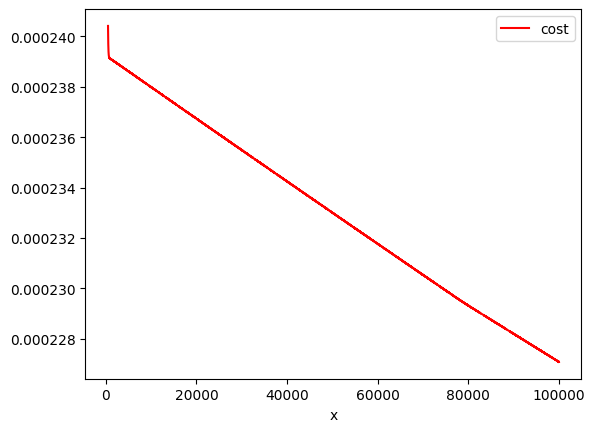

In [33]:
x = x1 + x2 + x3

x_data = np.arange(len(x))
x_data = (x_data+1).tolist()
y_data = closeValue.ravel()
y_data = (y_data/500000.).tolist()  # 정규화
# hypothesis = W * x_data + b
print("x_data = ", x_data)
print("y_data = ", y_data)

# cost 함수 그래프 그리기

plt.plot(x_axis_loop, y_axis_cost, 'r-', label='cost')
plt.legend()
plt.xlabel('x')
plt.show()


In [34]:
data = np.array([
    # X1,   X2,    X3,   Y
    [ 73.,  80.,  75., 152. ],
    [ 93.,  88.,  93., 185. ],
    [ 89.,  91.,  90., 180. ],
    [ 96.,  98., 100., 196. ],
    [ 73.,  66.,  70., 142. ]
], dtype=np.float32)

# slice data
X = data[:, :-1]
Y = data[:, [-1]]

print("X = ", X)
print("Y = ", Y)

W = tf.Variable(tf.random.normal((3, 1)))
b = tf.Variable(tf.random.normal((1,)))

print("W = ", W)
print("b = ", b)

learning_rate = 0.000001

# hypothesis, prediction function
def predict(X):
    return tf.matmul(X, W) + b

print("epoch | cost")

n_epochs = 500
for i in range(n_epochs+1):
    with tf.GradientTape() as tape:
        cost = tf.reduce_mean((tf.square(predict(X) - Y)))

    W_grad, b_grad = tape.gradient(cost, [W, b])

    W.assign_sub(learning_rate * W_grad)
    b.assign_sub(learning_rate * b_grad)

    if i % 100 == 0:
        print("{:5} | {:10.4f}".format(i, cost.numpy()))

X =  [[ 73.  80.  75.]
 [ 93.  88.  93.]
 [ 89.  91.  90.]
 [ 96.  98. 100.]
 [ 73.  66.  70.]]
Y =  [[152.]
 [185.]
 [180.]
 [196.]
 [142.]]
W =  <tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.3285832 ],
       [-0.12551123],
       [-1.0069368 ]], dtype=float32)>
b =  <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([-0.53956276], dtype=float32)>
epoch | cost
    0 | 89067.1484
  100 |    15.6275
  200 |     4.6393
  300 |     4.6141
  400 |     4.5903
  500 |     4.5666


In [35]:
# @title 실습 과제
##### 실습  과제
x1 = [0.98, 0.959, 0.959, 0.943]
x2 = [0.98, 0.963, 0.965, 0.945]
x3 = [0.96, 0.943, 0.948, 0.924]
Y =  [0.968, 0.948, 0.95, 0.93]

In [36]:
data = np.array([
    # X1,   X2,    X3,   Y
    [0.98,  0.98,  0.96, 0.968],
    [0.959,  0.963,  0.943, 0.948],
    [0.959,  0.965,  0.948, 0.95],
    [0.943,  0.945, 0.95, 0.93]
], dtype=np.float32)

# slice data
X = data[:, :-1]
Y = data[:, [-1]]

print("X = ", X)
print("Y = ", Y)

W = tf.Variable(tf.random.normal((3, 1)))
b = tf.Variable(tf.random.normal((1,)))

print("W = ", W)
print("b = ", b)

learning_rate = 0.000001

# hypothesis, prediction function
def predict(X):
    return tf.matmul(X, W) + b

print("epoch | cost")

n_epochs = 500
for i in range(n_epochs+1):
    with tf.GradientTape() as tape:
        cost = tf.reduce_mean((tf.square(predict(X) - Y)))

    W_grad, b_grad = tape.gradient(cost, [W, b])

    W.assign_sub(learning_rate * W_grad)
    b.assign_sub(learning_rate * b_grad)

    if i % 100 == 0:
        print("{:5} | {:10.4f}".format(i, cost.numpy()))

X =  [[0.98  0.98  0.96 ]
 [0.959 0.963 0.943]
 [0.959 0.965 0.948]
 [0.943 0.945 0.95 ]]
Y =  [[0.968]
 [0.948]
 [0.95 ]
 [0.93 ]]
W =  <tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-1.5461745 ],
       [-0.46511897],
       [ 1.3572711 ]], dtype=float32)>
b =  <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([1.698267], dtype=float32)>
epoch | cost
    0 |     0.0125
  100 |     0.0125
  200 |     0.0125
  300 |     0.0125
  400 |     0.0124
  500 |     0.0124
